# Linear approximation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_plot(x: np.ndarray, y: np.ndarray, argmin1: float, argmin2: float = None) -> None:
    fig, _ = plt.subplots(figsize=(9, 7))
    plt.plot(x, y, 'ro', label='Points')
    x_appx = np.linspace(0, 10, 1000)
    y_appx1 = argmin1 * x_appx
    plt.plot(x_appx, y_appx1, 'b-', label=f'ƒ(x) = kx\nargmin ≈ {float(argmin1)}', linewidth=2)
    
    plt.title('ƒ(x) approximation', fontsize=25)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.minorticks_on()
    if argmin2:
        y_appx2 = argmin2 * x_appx
        plt.plot(x_appx, y_appx2, 'y--', label=f'ƒ(x) = kx\nargmin ≈ {float(argmin2)}', linewidth=2)
    plt.legend(loc='best', fontsize=13)
    fig.tight_layout()
    plt.show()

### y = kx

In [3]:
# Input data
x = np.arange(10).astype(np.float)
y = x + .5 * np.random.randn(10)

# Сalculation arg_min
a, b = (x ** 2).mean(), (-2 * y * x).mean()
argmin = -b / (2 * a)

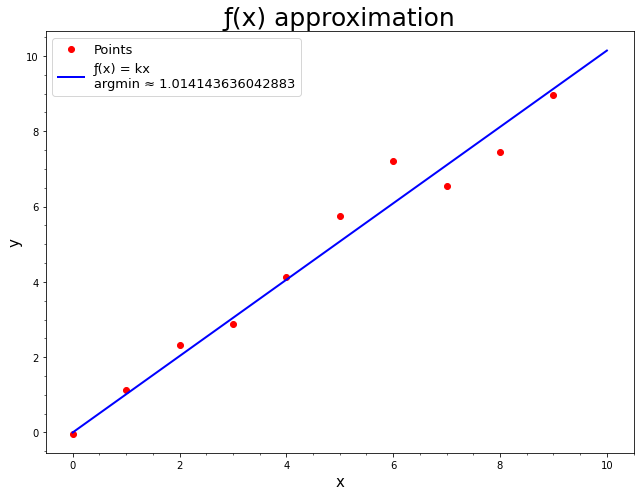

In [4]:
show_plot(x, y, argmin)